In [1]:
# Phần 1 : Đọc tập tin dữ liệu dự báo giá nhà
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# 1. Đọc tập tin dữ liệu housing-prices-dataset.csv
df = pd.read_csv("housing-prices-dataset.csv")

In [3]:
# 2. Xem thông tin sơ bộ : shape/head/tail/info
df.shape

(1460, 81)

In [4]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
# 3. Kiểm tra dữ liệu bị trùng và xử lý
df.duplicated().any()
# Không có dữ liệu trùng lặp

False

In [8]:
# # Phần 2 : Phân tích EDA
# 1.Chọn các biến sau đây để phân tích : 'LotShape', 'Street', 'HouseStyle', 'LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'SalePrice'
# Biến phụ thuộc là biến SalePrice
feature = ['LotShape', 'Street', 'HouseStyle', 'LotArea', 'YearBuilt',
           '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'SalePrice']
x = df[feature].drop(columns='SalePrice')
y = df['SalePrice']

In [9]:
# 2. Xác định chính xác các biến số, các biến phân loại (trong các biến ở câu 1)
for i in feature:
    n = df[i].nunique()
    if n <= 15:
        print(i, '-', df[i].unique())
    else:
        print(i, "- unique value:", n)

LotShape - ['Reg' 'IR1' 'IR2' 'IR3']
Street - ['Pave' 'Grvl']
HouseStyle - ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
LotArea - unique value: 1073
YearBuilt - unique value: 112
1stFlrSF - unique value: 753
2ndFlrSF - unique value: 417
FullBath - [2 1 3 0]
BedroomAbvGr - [3 4 1 2 0 5 6 8]
TotRmsAbvGrd - [ 8  6  7  9  5 11  4 10 12  3  2 14]
SalePrice - unique value: 663


In [10]:
x['BedroomAbvGr'] = x['BedroomAbvGr'].astype('str')
x['FullBath'] = x['FullBath'].astype('str')
x['TotRmsAbvGrd'] = x['TotRmsAbvGrd'].astype('str')

In [11]:
cat_cols = x.select_dtypes('object').columns
num_cols = x.select_dtypes('number').columns

In [12]:
# 3. Kiểm tra dữ liệu bị thiếu và xử lý
x.isnull().sum()

LotShape        0
Street          0
HouseStyle      0
LotArea         0
YearBuilt       0
1stFlrSF        0
2ndFlrSF        0
FullBath        0
BedroomAbvGr    0
TotRmsAbvGrd    0
dtype: int64

In [13]:
# 4. Phân tích 1 biến (cho nhận xét)
from analysis.analyzer import TTTH_Analyzer as Analyzer
_analyzer = Analyzer()

In [14]:
# Biến phân loại
x[cat_cols].head()

,LotShape,Street,HouseStyle,FullBath,BedroomAbvGr,TotRmsAbvGrd
0,Reg,Pave,2Story,2,3,8
1,Reg,Pave,1Story,2,3,6
2,IR1,Pave,2Story,2,3,6
3,IR1,Pave,2Story,1,3,7
4,IR1,Pave,2Story,2,4,9


Class count of LotShape:

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64


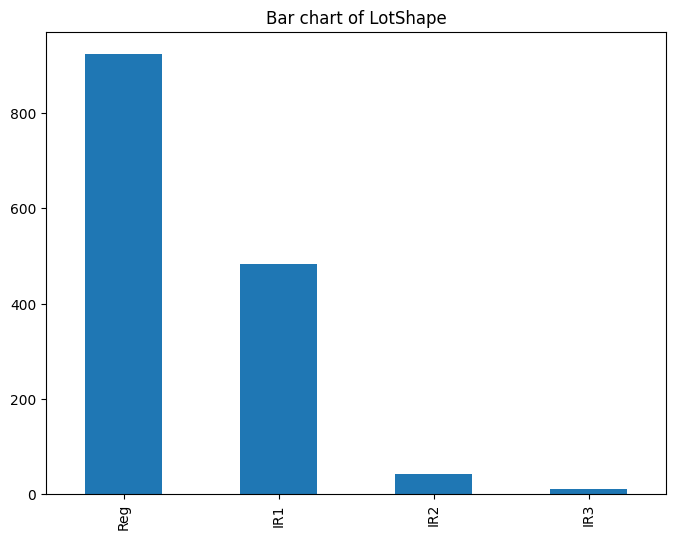

Class count of Street:

Pave    1454
Grvl       6
Name: Street, dtype: int64


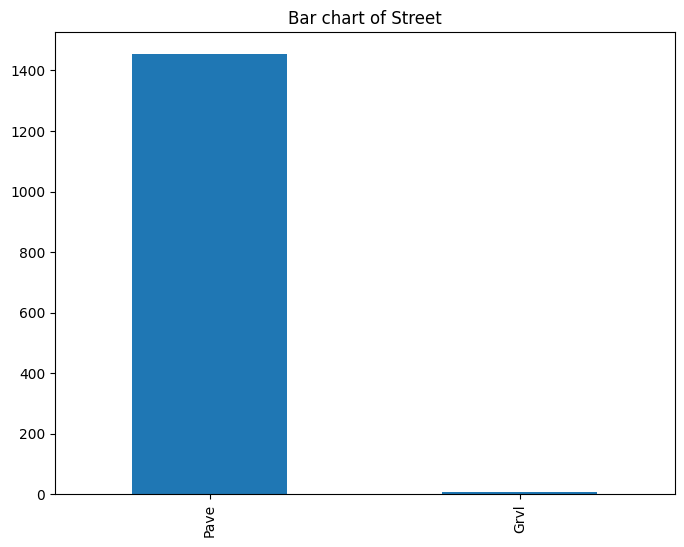

Class count of HouseStyle:

1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64


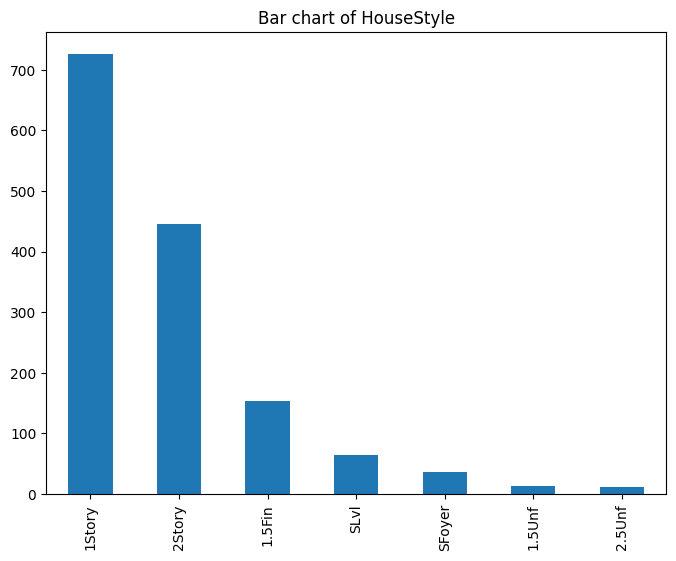

Class count of FullBath:

2    768
1    650
3     33
0      9
Name: FullBath, dtype: int64


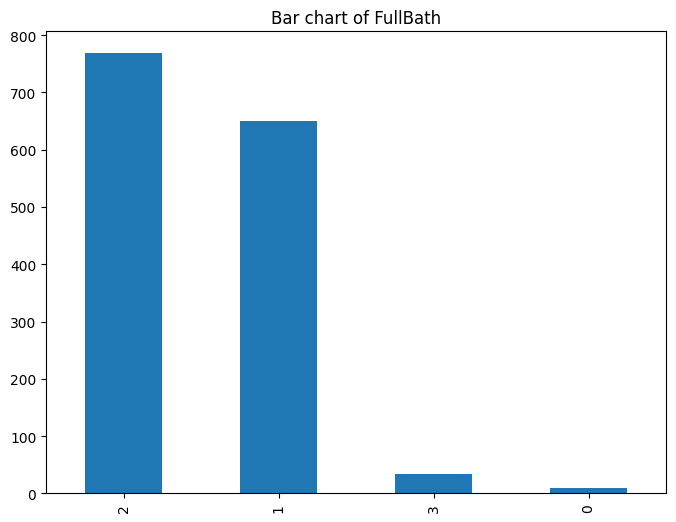

Class count of BedroomAbvGr:

3    804
2    358
4    213
1     50
5     21
6      7
0      6
8      1
Name: BedroomAbvGr, dtype: int64


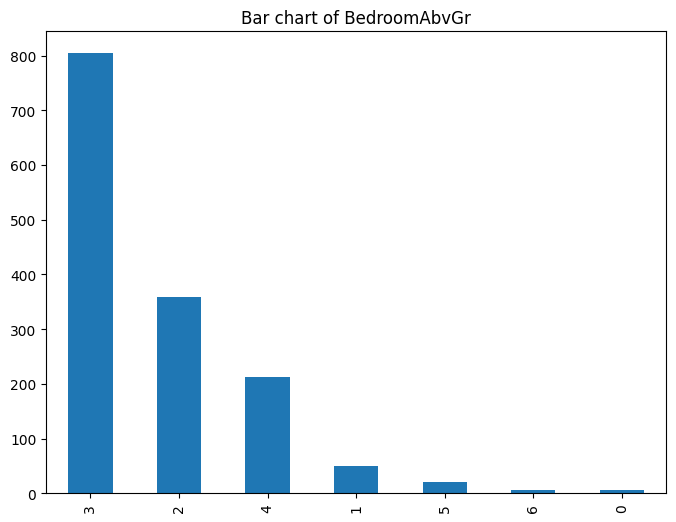

Class count of TotRmsAbvGrd:

6     402
7     329
5     275
8     187
4      97
9      75
10     47
11     18
3      17
12     11
2       1
14      1
Name: TotRmsAbvGrd, dtype: int64


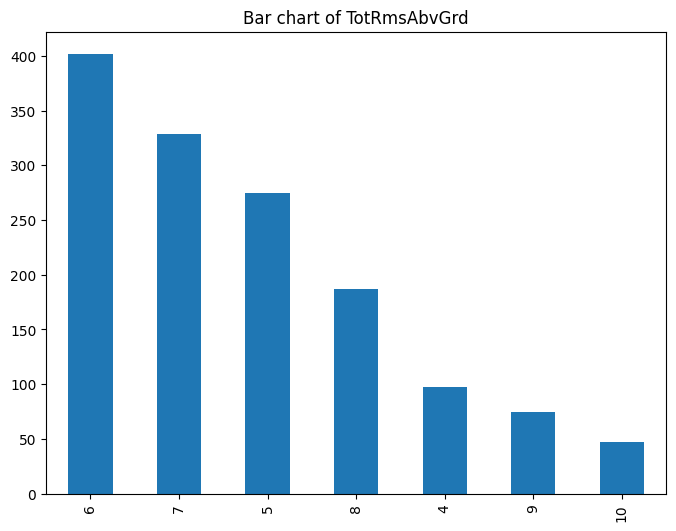

In [15]:
for col in cat_cols:
    _analyzer.analyze_category_variable(variable_name=col, df=x)
    print('='*60)

In [16]:
# Nhận xét về các biến categorical
# LotShape:
#   Reg (Regular): Có 925 mẫu, chiếm phần lớn trong tập dữ liệu khoảng 59.33% (925/1560).
#   IR1 (Slightly irregular): Có 484 mẫu, đây là một số lượng khá đáng kể khoảng 31.03% (484/1560).
#   IR2 (Moderately irregular): Chỉ có 41 mẫu, đây là một số lượng khá ít so với các nhóm khác khoảng 2.63% (41/1560).
#   IR3 (Irregular): Chỉ có 10 mẫu, đây là nhóm ít nhất trong tất cả khoảng 0.64% (10/1560).
#   => cần xử lý mất cân bằng :
ser_lot = x.LotShape.value_counts()
lotshape = ser_lot[ser_lot <= 100]
x.loc[x['LotShape'].isin(lotshape.index), 'LotShape'] = 'Other'
print(x.LotShape.value_counts())
# Street:
#   Pave (Paved): Có 1454 mẫu, chiếm phần lớn trong tập dữ liệu khoảng 93.21% (1454/1560).
#   Grvl (Gravel): Chỉ có 6 mẫu, đây là một số lượng rất ít so với nhóm Paved khoảng 0.38% (6/1560).
# HouseStyle:
#   1Story (Nhà một tầng): Chiếm tỷ lệ cao nhất trong tập dữ liệu, với 726 mẫu . Điều này cho thấy rằng các căn nhà một tầng phổ biến trong tập dữ liệu này khoảng 46.54% (726/1560).
#   2Story (Nhà hai tầng): Là nhóm tiếp theo với 445 mẫu. Các căn nhà hai tầng cũng được xây dựng khá phổ biến khoảng 28.53% (445/1560).
#   1.5Fin (Nhà một tầng và nửa tầng hoàn thiện): Có 154 mẫu. Đây có thể là các căn nhà một tầng với một phần của tầng trên đã được hoàn thiện và chiếm khoảng 9.87% (154/1560).
#   SLvl (Nhà trên độ cao): Với 65 mẫu, là nhóm khá nhỏ so với các nhóm trước khoảng 4.17% (65/1560).
#   SFoyer (Nhà với hành lang): Chiếm tỷ lệ nhỏ hơn với 37 mẫu. Có thể đây là các căn nhà có hành lang hoặc sảnh rộng rãi, chiếm khoảng 2.37% (37/1560).
#   1.5Unf (Nhà một tầng và nửa tầng chưa hoàn thiện): Có 14 mẫu chiếm khoảng 0.9% (14/1560).
#   2.5Unf (Nhà hai tầng và nửa tầng chưa hoàn thiện): Có 11 mẫu chiếm khoảng 0.71% (11/1560).
#   2.5Fin (Nhà hai tầng và nửa tầng hoàn thiện): Là nhóm ít nhất với chỉ 8 mẫu chiếm khoảng 0.51% (8/1560).
#   => cần xử lý mất cân bằng :
ser_house = x.HouseStyle.value_counts()
housestyle = ser_house[ser_house <= 100]
x.loc[x['HouseStyle'].isin(housestyle.index), 'HouseStyle'] = 'Other'
print(x.HouseStyle.value_counts())
# FullBath:
#   FullBath = 2: Chiếm tỷ lệ cao nhất trong tập dữ liệu, với 768 mẫu. Điều này cho thấy rằng số lượng phòng tắm đầy đủ (bao gồm cả bồn tắm hoặc vòi sen,
#   lavabo và toilet) là phổ biến nhất trong tập dữ liệu. Chiếm khoảng 49.23% (768/1560) trong tập dữ liệu.
#   FullBath = 1: Là nhóm tiếp theo với 650 mẫu. Các căn nhà chỉ có một phòng tắm đầy đủ cũng khá phổ biến. Chiếm khoảng 41.67% (650/1560).
#   FullBath = 3: Có 33 mẫu. Số lượng căn nhà có ba phòng tắm đầy đủ là ít so với các nhóm khác, nhưng vẫn đáng kể. Chiếm khoảng 2.12% (33/1560).
#   FullBath = 0: Chiếm tỷ lệ nhỏ nhất với chỉ 9 mẫu. Điều này có thể đại diện cho các căn nhà không có phòng tắm đầy đủ, có thể chỉ có toilet và
#   lavabo hoặc không có cả phòng tắm. Chiếm khoảng 0.58% (9/1560).
# BedroomAbvGr:
#   BedroomAbvGr = 3: Chiếm tỷ lệ cao nhất khoảng 51.54% (804/1560)trong tập dữ liệu, với 804 mẫu.
#   BedroomAbvGr = 2: Là nhóm tiếp theo với 358 mẫu. Có một số lượng đáng kể các căn nhà có 2 phòng ngủ trên mặt đất. Chiếm khoảng 22.95% (358/1560).
#   BedroomAbvGr = 4: Có 213 mẫu. Số lượng căn nhà có 4 phòng ngủ trên mặt đất cũng khá đáng kể. Chiếm khoảng 13.65% (213/1560).
#   BedroomAbvGr = 1: Chiếm tỷ lệ nhỏ hơn với 50 mẫu. Đây là các căn nhà có số lượng phòng ngủ trên mặt đất ít nhất trong tập dữ liệu. Chiếm khoảng 3.21% (50/1560).
#   BedroomAbvGr = 5, 6, 0, 8: Các nhóm này chiếm tỷ lệ nhỏ hơn với 21, 7, 6 và 1 mẫu tương ứng.
#   Có thể thấy rằng số lượng các căn nhà có số lượng phòng ngủ trên mặt đất lớn hơn hoặc bằng 5 hoặc lớn hơn hoặc bằng 6 đều rất ít.
#   5: Chiếm khoảng 1.35% (21/1560).
#   6: Chiếm khoảng 0.45% (7/1560).
#   0: Chiếm khoảng 0.38% (6/1560).
#   8: Chiếm khoảng 0.06% (1/1560).
# TotRmsAbvGrd:
#   Có 402 mẫu có 6 phòng trên mặt đất (TotRmsAbvGrd).Chiếm khoảng 25.77% (402/1560) trong tập dữ liệu.
#   329 mẫu có 7 phòng trên mặt đất. Chiếm khoảng 21.09% (329/1560).
#   275 mẫu có 5 phòng trên mặt đất. Chiếm khoảng 17.63% (275/1560).
#   Các loại số phòng trên mặt đất khác có số lượng ít hơn, từ 1 đến 14.
#   8: Chiếm khoảng 11.98% (187/1560).
#   4: Chiếm khoảng 6.21% (97/1560).
#   9: Chiếm khoảng 4.81% (75/1560).
#   10: Chiếm khoảng 3.01% (47/1560).
#   11: Chiếm khoảng 1.15% (18/1560).
#   3: Chiếm khoảng 1.09% (17/1560).
#   12: Chiếm khoảng 0.71% (11/1560).
#   2: Chiếm khoảng 0.06% (1/1560).
#   14: Chiếm khoảng 0.06% (1/1560).

Reg      925
IR1      484
Other     51
Name: LotShape, dtype: int64
1Story    726
2Story    445
1.5Fin    154
Other     135
Name: HouseStyle, dtype: int64


In [17]:
# Biến số
x[num_cols].head()

,LotArea,YearBuilt,1stFlrSF,2ndFlrSF
0,8450,2003,856,854
1,9600,1976,1262,0
2,11250,2001,920,866
3,9550,1915,961,756
4,14260,2000,1145,1053


=====
central tendency of LotArea: {'mean': 10516.828082191782, 'median': 9478.5, 'mode': 7200, 'min': 1300, 'max': 215245, 'range': 213945}
=====
Dispersion of LotArea: 
 {'range': 213945, 'q1': 7553.5, 'q3': 11601.5, 'iqr': 4048.0, 'var': 99625649.6503417, 'skew': 12.207687851233496, 'kurtosis': 203.24327101886033}
=====


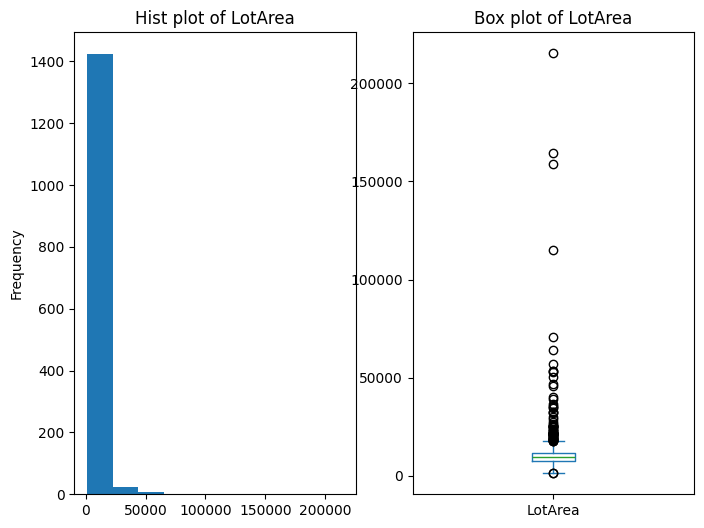

=====
central tendency of YearBuilt: {'mean': 1971.267808219178, 'median': 1973.0, 'mode': 2006, 'min': 1872, 'max': 2010, 'range': 138}
=====
Dispersion of YearBuilt: 
 {'range': 138, 'q1': 1954.0, 'q3': 2000.0, 'iqr': 46.0, 'var': 912.2154126019891, 'skew': -0.613461172488183, 'kurtosis': -0.43955194159361977}
=====


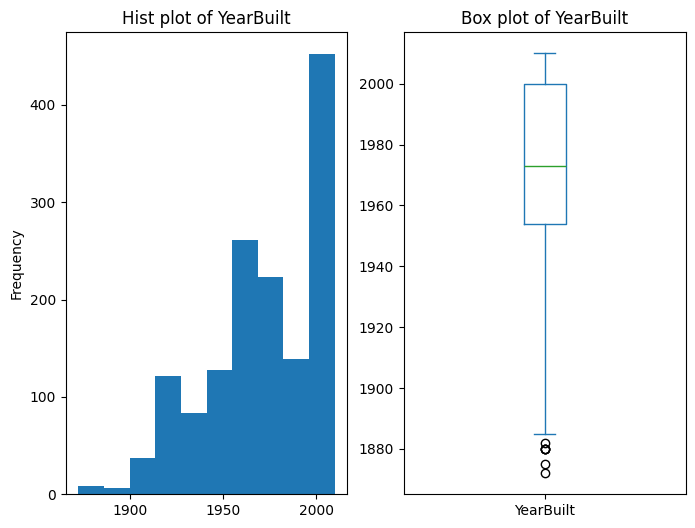

=====
central tendency of 1stFlrSF: {'mean': 1162.626712328767, 'median': 1087.0, 'mode': 864, 'min': 334, 'max': 4692, 'range': 4358}
=====
Dispersion of 1stFlrSF: 
 {'range': 4358, 'q1': 882.0, 'q3': 1391.25, 'iqr': 509.25, 'var': 149450.07920371392, 'skew': 1.3767566220336365, 'kurtosis': 5.74584148244079}
=====


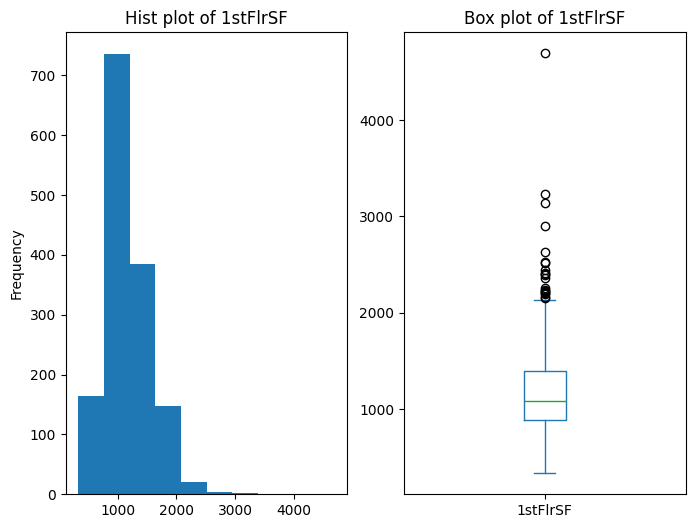

=====
central tendency of 2ndFlrSF: {'mean': 346.99246575342465, 'median': 0.0, 'mode': 0, 'min': 0, 'max': 2065, 'range': 2065}
=====
Dispersion of 2ndFlrSF: 
 {'range': 2065, 'q1': 0.0, 'q3': 728.0, 'iqr': 728.0, 'var': 190557.0753373038, 'skew': 0.8130298163023265, 'kurtosis': -0.5534635576075795}
=====


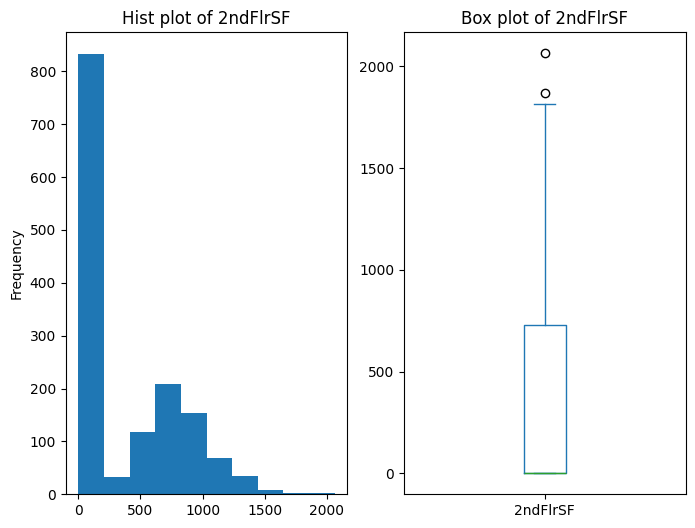

In [18]:
for col in num_cols:
    _analyzer.analyze_numeric_variable(variable_name=col, df=x)
    print('='*60)

In [19]:
# #Nhận xét biến Continuous
# LotArea:
#   Trung tâm: Giá trị trung bình (mean) của diện tích lô là khoảng 10,517.83 square feet
#   Giá trị trung vị (median) là 9,478.5 square feet.
#   Mode (chế độ) là 7,200 square feet, xuất hiện nhiều nhất. Diện tích lô dao động từ 1,300 square feet đến 215,245 square feet.
#   Phân tán: Phạm vi (range) của diện tích lô lớn đến 213,945 square feet.
#   Phạm vi giữa (interquartile range - IQR) là 4,048.0, chỉ ra rằng khoảng 50% dữ liệu tập trung từ khoảng 7,553.5 square feet đến 11,601.5 square feet.
#   Độ lệch (skewness) là 12.21, cho thấy phân phối lệch phải.
#   Độ đỉnh (kurtosis) là 203.24, cho thấy phân phối của diện tích lô rất cao và hẹp.
# YearBuilt:
#   Trung tâm: Năm xây dựng trung bình là khoảng 1,971,
#   Năm trung vị là 1,973.
#   Năm xây dựng có nhiều căn nhà nhất (mode) là năm 2006.
#   Phân tán: Phạm vi năm xây dựng chỉ có 138 năm, từ 1872 đến 2010.
#   Phạm vi giữa (IQR) là 46 năm, chỉ ra rằng 50% dữ liệu tập trung từ khoảng 1,954 đến 2,000.
#   Độ lệch (skewness) là -0.61, cho thấy phân phối lệch trái nhẹ.
#   Độ đỉnh (kurtosis) là -0.44, cho thấy phân phối của năm xây dựng khá phân tán.
# 1stFlrSF:
#   Trung tâm: Diện tích tầng trên mặt đất trung bình là khoảng 1,162.63 square feet
#   Diện tích trung vị là 1,087 square feet. Diện tích tầng này dao động từ 334 square feet đến 4,692 square feet.
#   Phân tán: Phạm vi diện tích lớn đến 4,358 square feet.
#   Phạm vi giữa (IQR) là 509.25 square feet.
#   Độ lệch (skewness) là 1.38, cho thấy phân phối lệch phải.
#   Độ đỉnh (kurtosis) là 5.75, cho thấy phân phối của diện tích tầng trên mặt đất có đỉnh cao và đuôi dài.
# 2ndFlrSF:
#   Trung tâm: Diện tích tầng hai trên mặt đất trung bình là khoảng 347 square feet
#   Diện tích trung vị là 0 square feet. Có sự biến thiên từ 0 square feet đến 2,065 square feet.
#   Phân tán: Phạm vi diện tích lớn đến 2,065 square feet.
#   Phạm vi giữa (IQR) là 728 square feet.
#   Độ lệch (skewness) là 0.81, cho thấy phân phối lệch phải nhẹ.
#   Độ đỉnh (kurtosis) là -0.55, cho thấy phân phối có đỉnh thấp và phân tán.

            LotArea  SalePrice
LotArea    1.000000   0.263843
SalePrice  0.263843   1.000000


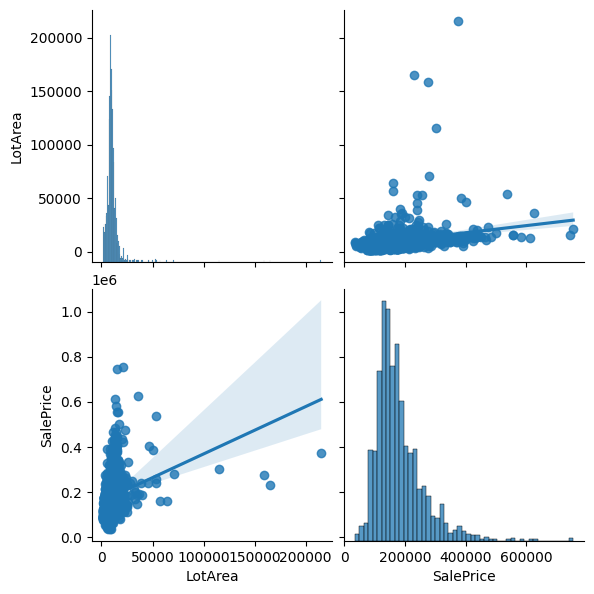

           YearBuilt  SalePrice
YearBuilt   1.000000   0.522897
SalePrice   0.522897   1.000000


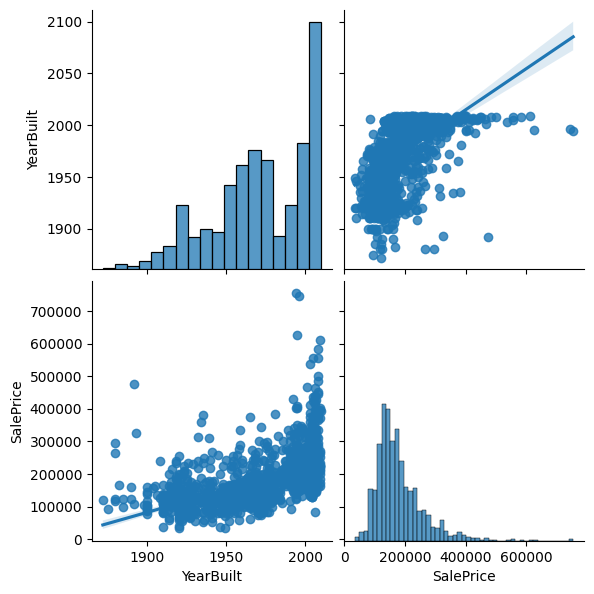

           1stFlrSF  SalePrice
1stFlrSF   1.000000   0.605852
SalePrice  0.605852   1.000000


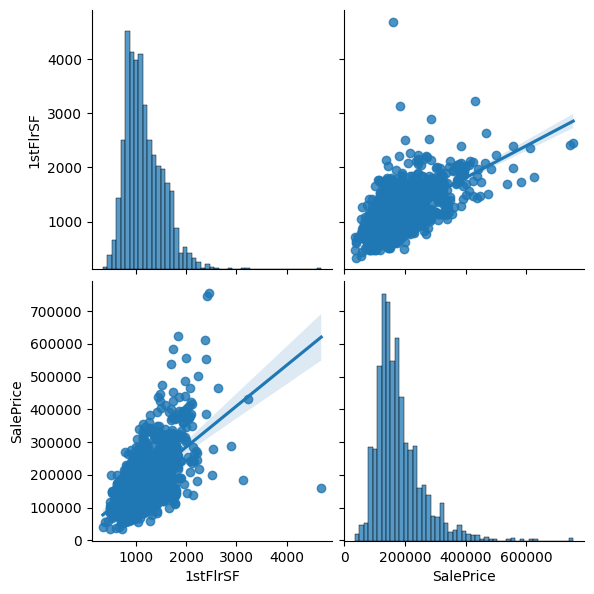

           2ndFlrSF  SalePrice
2ndFlrSF   1.000000   0.319334
SalePrice  0.319334   1.000000


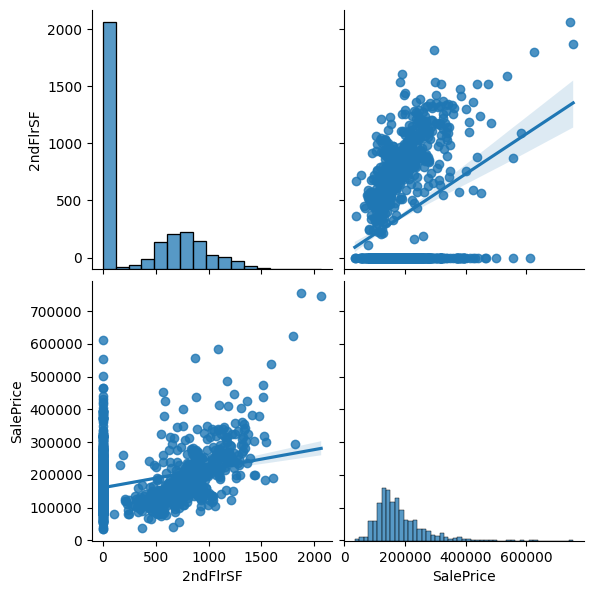

In [20]:
# 5. Phân tích 2 biến (cho nhận xét)
# Biến liên tục và liên tục (Các biến số với biến SalePrice)
for col in num_cols:
    print(df[[col, 'SalePrice']].corr())
    sns.pairplot(data=df, vars=[col, 'SalePrice'], size=3, kind='reg')
    plt.show()

In [21]:
# Nhận xét:
# Dựa trên các hệ số tương quan đã được cung cấp, chúng ta có thể nhận xét về mức độ tương quan giữa các biến và "SalePrice":

#   LotArea và SalePrice: Hệ số tương quan là khoảng 0.26, cho thấy một mức độ tương quan yếu giữa diện tích lô đất và giá bán.

#   YearBuilt và SalePrice: Hệ số tương quan là khoảng 0.52, cho thấy một mức độ tương quan trung bình đến mạnh giữa năm xây dựng của ngôi nhà và giá bán.
#   Điều này ngụ ý rằng các ngôi nhà mới hơn có xu hướng có giá bán cao hơn.

#   1stFlrSF và SalePrice: Hệ số tương quan là khoảng 0.61, cho thấy một mức độ tương quan mạnh giữa diện tích sàn tầng trệt và giá bán.
#   Điều này ngụ ý rằng diện tích sàn tầng trệt lớn hơn thường đi kèm với giá bán cao hơn.

#   2ndFlrSF và SalePrice: Hệ số tương quan là khoảng 0.32, cho thấy một mức độ tương quan tương đối yếu giữa diện tích sàn tầng 2 và giá bán.
#   => diện tích sàn tầng 2 không có ảnh hưởng lớn đến giá bán so với diện tích sàn tầng trệt.

In [22]:
# Phân tích biến category với continues (Các biến phân loại với biến SalePrice)
# Groupby (LotShape	Street	HouseStyle	FullBath	BedroomAbvGr	TotRmsAbvGrd)
from scipy.stats import f_oneway
import statsmodels.api as sm
from statsmodels.formula.api import ols
for col in cat_cols:

    df.groupby(col).size()
    lst = []
    for name, g in df.groupby(col):
        lst.append(g['SalePrice'])
    f_statistic, p_value = f_oneway(*lst)
    formula = 'SalePrice ~ ' + col
    model = ols(formula, data=df).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    print("\tBảng Kiểm ĐỊnh ANOVA {} \n".format(formula), anova_table, "\n")

	Bảng Kiểm ĐỊnh ANOVA SalePrice ~ LotShape 
                 sum_sq      df          F        PR(>F)
LotShape  7.032607e+11     3.0  40.132852  6.447524e-25
Residual  8.504651e+12  1456.0        NaN           NaN 

	Bảng Kiểm ĐỊnh ANOVA SalePrice ~ Street 
                 sum_sq      df        F    PR(>F)
Street    1.550534e+10     1.0  2.45929  0.117049
Residual  9.192406e+12  1458.0      NaN       NaN 

	Bảng Kiểm ĐỊnh ANOVA SalePrice ~ HouseStyle 
                   sum_sq      df          F        PR(>F)
HouseStyle  7.947590e+11     7.0  19.595001  3.376777e-25
Residual    8.413152e+12  1452.0        NaN           NaN 

	Bảng Kiểm ĐỊnh ANOVA SalePrice ~ FullBath 
                 sum_sq      df           F         PR(>F)
FullBath  2.894450e+12     1.0  668.430296  1.236470e-121
Residual  6.313461e+12  1458.0         NaN            NaN 

	Bảng Kiểm ĐỊnh ANOVA SalePrice ~ BedroomAbvGr 
                     sum_sq      df          F        PR(>F)
BedroomAbvGr  2.605440e+11     1.0  4

In [23]:
# LotShape:
#   Giá trị F rất cao (40.132852) và giá trị p rất thấp (cực kỳ gần với không).
#   Có sự khác biệt đáng kể giữa các nhóm LotShape đối với giá bán (SalePrice).

# Street:
#   Giá trị p (0.117049) vượt quá ngưỡng ý nghĩa thống kê (0.05).
#   Không có bằng chứng thống kê để chấp nhận giả thuyết rằng có sự khác biệt đáng kể về giá bán (SalePrice) giữa các loại đường (Street).

# HouseStyle:
#   Giá trị F rất cao (19.595001) và giá trị p rất thấp.
#   Có sự khác biệt đáng kể giữa các loại kiểu nhà (HouseStyle) đối với giá bán (SalePrice).

# FullBath:
#   Giá trị F cực kỳ cao (668.430296) và giá trị p rất thấp.
#   Có sự khác biệt đáng kể giữa số lượng phòng tắm (FullBath) đối với giá bán (SalePrice).

# BedroomAbvGr:
#   Giá trị F cao (42.456412) và giá trị p rất thấp.
#   Có sự khác biệt đáng kể giữa số lượng phòng ngủ (BedroomAbvGr) đối với giá bán (SalePrice).

# TotRmsAbvGrd:
#   Giá trị F rất cao (580.762801) và giá trị p rất thấp.
#   Có sự khác biệt đáng kể giữa số lượng phòng (TotRmsAbvGrd) đối với giá bán (SalePrice).
# => Tóm lại, các biến LotShape, HouseStyle, FullBath, BedroomAbvGr và TotRmsAbvGrd có ảnh hưởng đáng kể đến giá bán (SalePrice) trong khi biến Street thì không.

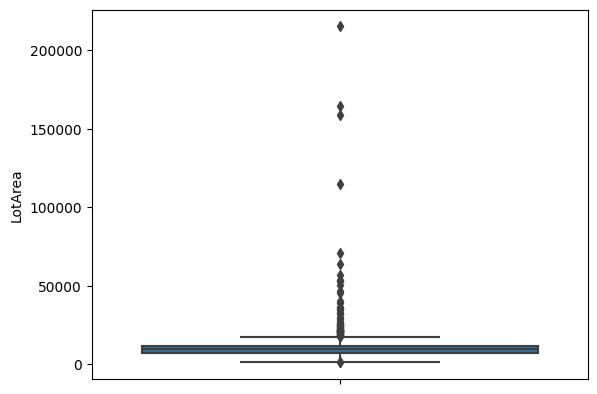

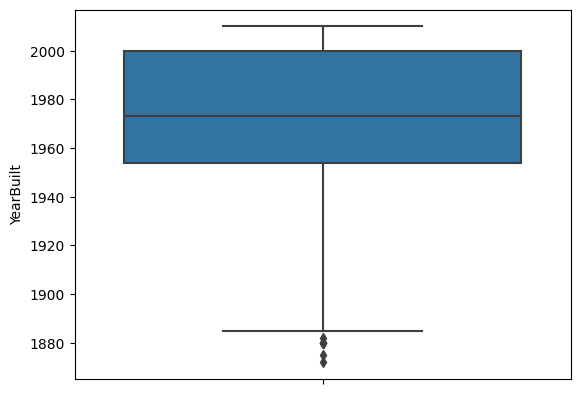

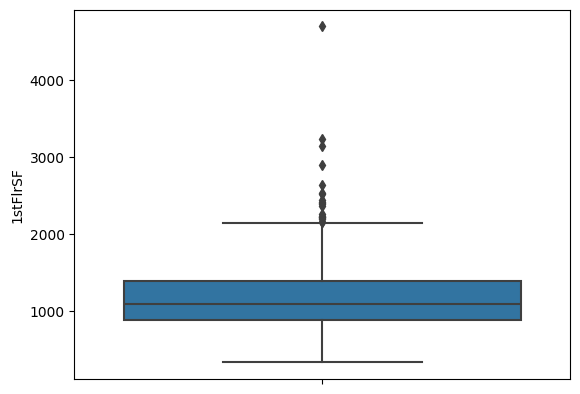

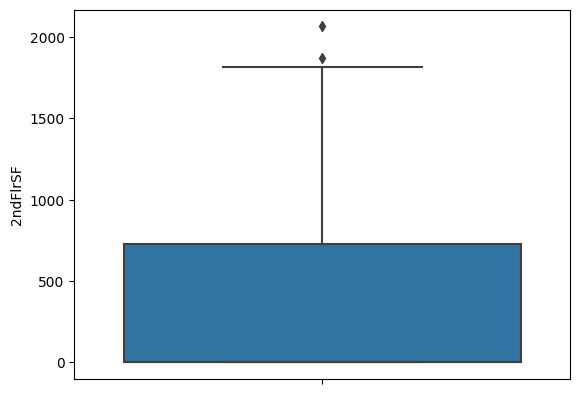

In [24]:
# 6. Kiểm tra và xóa các outlier
for col in num_cols:
    sns.boxplot(data=x, y=col)
    plt.show()

In [25]:
# Dùng IQR method
def remove_outliers(df, column_name, lower_percentile=0.25, upper_percentile=0.75, threshold=1.5):
    Q1 = df[column_name].quantile(lower_percentile)
    Q3 = df[column_name].quantile(upper_percentile)
    IQR = Q3 - Q1
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR
    return df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]

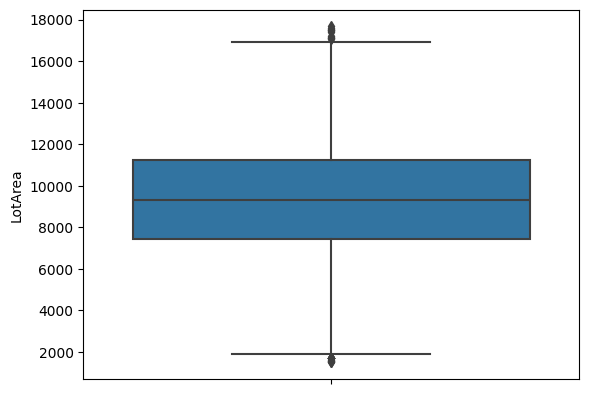

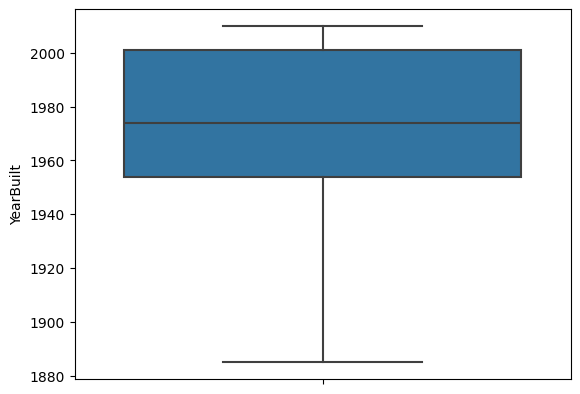

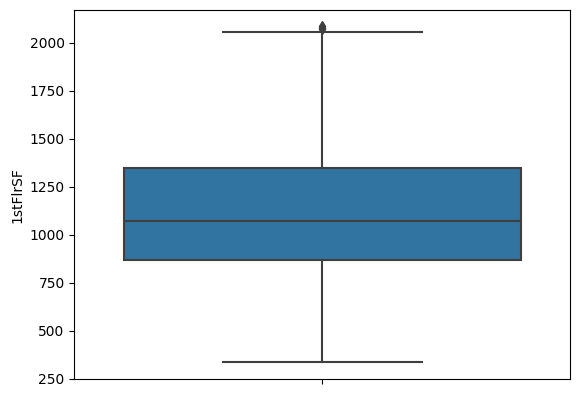

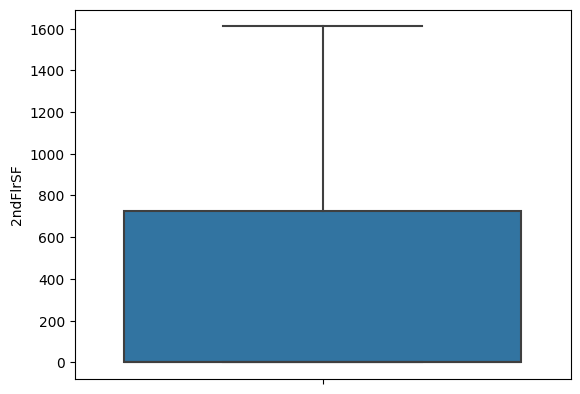

In [26]:
for col in num_cols:
    x[num_cols] = remove_outliers(x[num_cols], col)
    sns.boxplot(data=x[num_cols], y=col)
    plt.show()

In [27]:
# Dựa vào nhận xét khi phân tích 1 biến, ta có:
#   LotShape chỉ có 4 trường hợp phân loại và k có thứ tự, vì vậy sử dụng one-hot encoder
#   Street và HouseStyle cũng có ít trường hợp và k có thứ tự nên sử dụng one-hot encoder
#   TotRmsAbvGrd có nhiều trường hợp phân loại và có số thứ tự, nên sử dụng label encoder

In [28]:
# Label encoder:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [29]:
x['TotRmsAbvGrd_le'] = le.fit_transform(x['TotRmsAbvGrd'])

In [30]:
# OneHotEncoder cho 'LotShape', 'Street', 'HouseStyle'
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
l_catcols = ['LotShape', 'HouseStyle']
for col in l_catcols:
    x_col_onehot = ohe.fit_transform(x[[col]]).toarray()
    xOneHot = pd.DataFrame(x_col_onehot, columns=[
                           '{}_{}'.format(col, i) for i in ohe.categories_[0]])
    x = pd.concat([x, xOneHot], axis=1)
x.columns

Index(['LotShape', 'Street', 'HouseStyle', 'LotArea', 'YearBuilt', '1stFlrSF',
       '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd',
       'TotRmsAbvGrd_le', 'LotShape_IR1', 'LotShape_Other', 'LotShape_Reg',
       'HouseStyle_1.5Fin', 'HouseStyle_1Story', 'HouseStyle_2Story',
       'HouseStyle_Other'],
      dtype='object')

In [31]:
# 2. Chuẩn hóa các biến số input bằng Log Normalization/ Standard Scaler/ min-max Scaler/ Robust Scaler
# Dựa vào phần phân tích đơn biến cho các biến số liên tục, ta có:
#   Log Normalization: Có thể được áp dụng cho các biến có phân phối lệch như 'LotArea', 'YearBuilt'.
#   Standard Scaler: Thích hợp cho các biến có phân phối gần với phân phối chuẩn, có thể áp dụng cho '1stFlrSF' và '2ndFlrSF' nếu chúng gần với phân phối chuẩn.
# Kiểm tra phương sai :
for col in num_cols:
    print("Phương sai của {} là : {}".format(col, x[col].var()))

Phương sai của LotArea là : 10047967.88791584
Phương sai của YearBuilt là : 888.9323256050943
Phương sai của 1stFlrSF là : 112400.74437383038
Phương sai của 2ndFlrSF là : 179543.10430067562


In [32]:
# Như đã nhận xét, ta sẽ sử dụng phương thức chuẩn hóa Log Normalization cho 'LotArea', 'YearBuilt'
x['LotArea_log'] = np.log(x['LotArea'])
print("Phương sai của {} là : {}".format(
    'LotArea_log', x['LotArea_log'].var()))
x['YearBuilt_log'] = np.log(x['YearBuilt'])
print("Phương sai của {} là : {}".format(
    'YearBuilt_log', x['YearBuilt_log'].var()))

Phương sai của LotArea_log là : 0.19072407434963373
Phương sai của YearBuilt_log là : 0.00023064384258166852


In [33]:
# Tiếp theo, ta sẽ sử dụng phương thức chuẩn hóa Standard Scaler cho '1stFlrSF' và '2ndFlrSF'
from scipy import stats
# Kiểm định Shapiro-Wilk
# H0: dữ liệu có dạng phân phối chuẩn
# Mức ý nghĩa (alpha)
alpha = 0.05
# 1stFlrSF
statistic, p_value = stats.shapiro(x['1stFlrSF'])
if p_value <= alpha:
    print("Có bằng chứng để từ chối giả thuyết H0 cho x['1stFlrSF'].")
else:
    print("Không có bằng chứng để từ chối giả thuyết H0 cho x['1stFlrSF'] .")
# 2ndFlrSF
statistic, p_value = stats.shapiro(x['2ndFlrSF'])
if p_value <= alpha:
    print("Có bằng chứng để từ chối giả thuyết H0 cho x['2ndFlrSF'].")
else:
    print("Không có bằng chứng để từ chối giả thuyết H0 cho x['2ndFlrSF'] .")

Không có bằng chứng để từ chối giả thuyết H0 cho x['1stFlrSF'] .
Không có bằng chứng để từ chối giả thuyết H0 cho x['2ndFlrSF'] .


In [34]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
scaled_x = scaler.fit_transform(x[['1stFlrSF', '2ndFlrSF']])  # fit + transform
scaled_x = pd.DataFrame(
    scaled_x, columns=['1stFlrSF_scaled', '2ndFlrSF_scaled'])

In [35]:
x = pd.concat([x, scaled_x], axis=1)

In [36]:
feature_delete = ['LotShape', 'Street', 'HouseStyle', 'LotArea',
                  'YearBuilt', '1stFlrSF', '2ndFlrSF', 'TotRmsAbvGrd']

x = x.drop(columns=feature_delete)

In [37]:
# Phần 4 : Tạo mô hình Linear Regression và đánh giá (2đ)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [38]:
x

,FullBath,BedroomAbvGr,TotRmsAbvGrd_le,LotShape_IR1,LotShape_Other,LotShape_Reg,HouseStyle_1.5Fin,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_Other,LotArea_log,YearBuilt_log,1stFlrSF_scaled,2ndFlrSF_scaled
0,2,3,10,0.0,0.0,1.0,0.0,0.0,1.0,0.0,9.041922,7.602401,-0.814390,1.215261
1,2,3,8,0.0,0.0,1.0,0.0,1.0,0.0,0.0,9.169518,7.588830,0.397046,-0.800934
2,2,3,8,1.0,0.0,0.0,0.0,0.0,1.0,0.0,9.328123,7.601402,-0.623424,1.243591
3,1,3,9,1.0,0.0,0.0,0.0,0.0,1.0,0.0,9.164296,7.557473,-0.501087,0.983894
4,2,4,11,1.0,0.0,0.0,0.0,0.0,1.0,0.0,9.565214,7.600902,0.047938,1.685077
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,2,3,9,0.0,0.0,1.0,0.0,0.0,1.0,0.0,8.976768,7.600402,-0.524958,0.837519
1456,2,3,9,0.0,0.0,1.0,0.0,1.0,0.0,0.0,9.486076,7.589842,2.816934,-0.800934
1457,2,4,11,0.0,0.0,1.0,0.0,0.0,1.0,0.0,9.109636,7.570959,0.176243,1.918804
1458,1,2,7,0.0,0.0,1.0,0.0,1.0,0.0,0.0,9.181632,7.575585,-0.151979,-0.800934


In [39]:
x.isnull().sum()

FullBath              0
BedroomAbvGr          0
TotRmsAbvGrd_le       0
LotShape_IR1          0
LotShape_Other        0
LotShape_Reg          0
HouseStyle_1.5Fin     0
HouseStyle_1Story     0
HouseStyle_2Story     0
HouseStyle_Other      0
LotArea_log          94
YearBuilt_log        94
1stFlrSF_scaled      94
2ndFlrSF_scaled      94
dtype: int64

In [40]:
# Nhận thấy sau khi xóa out liner, ['LotArea_log','YearBuilt_log','1stFlrSF_scaled','2ndFlrSF_scaled'] có giá trị null
process_list = ['LotArea_log', 'YearBuilt_log',
                '1stFlrSF_scaled', '2ndFlrSF_scaled']
for col in process_list:
    m = x[col].mean()
    x[col].fillna(m, inplace=True)

In [41]:
# Kiểm tra lại trước khi tạo mô hình
x.isnull().sum()

FullBath             0
BedroomAbvGr         0
TotRmsAbvGrd_le      0
LotShape_IR1         0
LotShape_Other       0
LotShape_Reg         0
HouseStyle_1.5Fin    0
HouseStyle_1Story    0
HouseStyle_2Story    0
HouseStyle_Other     0
LotArea_log          0
YearBuilt_log        0
1stFlrSF_scaled      0
2ndFlrSF_scaled      0
dtype: int64

In [42]:
# Tạo mô hình

x_train, x_test, y_train, y_test = train_test_split(
    x, y, random_state=42, test_size=0.2)

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [43]:
# Đánh giá mô hình (score: r squared,mse,mae, vẽ biểu đồ)
# r squared
print('The train R-square is:', model.score(x_train, y_train))
print('The test R-square is:', model.score(x_test, y_test))
print('The full R-square is:', model.score(x, y))

The train R-square is: 0.5979792725735802
The test R-square is: 0.6124224418038806
The full R-square is: 0.6015614710496635


The train MSE of SalePrice and predicted value is: 2397872882.446864
The train MAE of SalePrice and predicted value is: 30392.711269851505


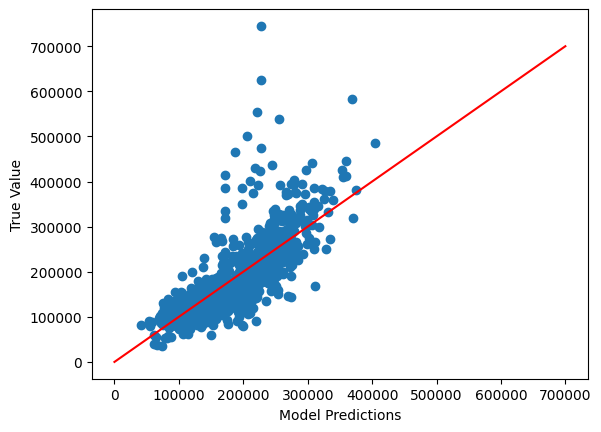

In [44]:
# mse, mae
from sklearn.metrics import mean_squared_error, mean_absolute_error
# train
yhat = model.predict(x_train)
mse = mean_squared_error(y_train, yhat)
mae = mean_absolute_error(y_train, yhat)
print('The train MSE of SalePrice and predicted value is:', mse)
print('The train MAE of SalePrice and predicted value is:', mae)
plt.scatter(yhat, y_train)
plt.xlabel('Model Predictions')
plt.ylabel('True Value')
plt.plot([0, 700000], [0, 700000], '-', color='r')
plt.show()

The test MSE of SalePrice and predicted value is: 2972846301.949288
The test MAE of SalePrice and predicted value is: 30574.16821739135


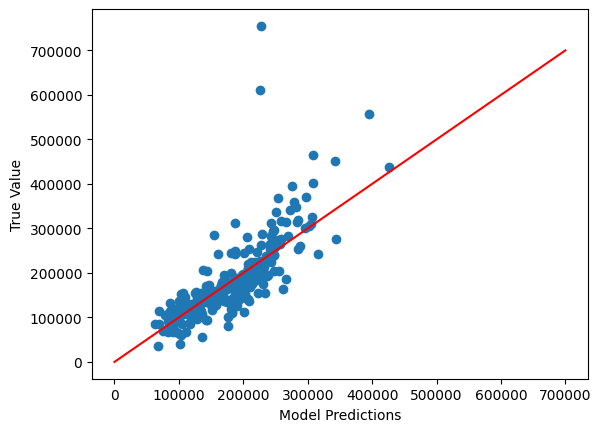

In [45]:
# Test
yhat = model.predict(x_test)
mse = mean_squared_error(y_test, yhat)
mae = mean_absolute_error(y_test, yhat)
print('The test MSE of SalePrice and predicted value is:', mse)
print('The test MAE of SalePrice and predicted value is:', mae)
plt.scatter(yhat, y_test)
plt.xlabel('Model Predictions')
plt.ylabel('True Value')
plt.plot([0, 700000], [0, 700000], '-', color='r')
plt.show()

The full MSE of SalePrice and predicted value is: 2512867566.3473487
The full MAE of SalePrice and predicted value is: 30429.002659359474


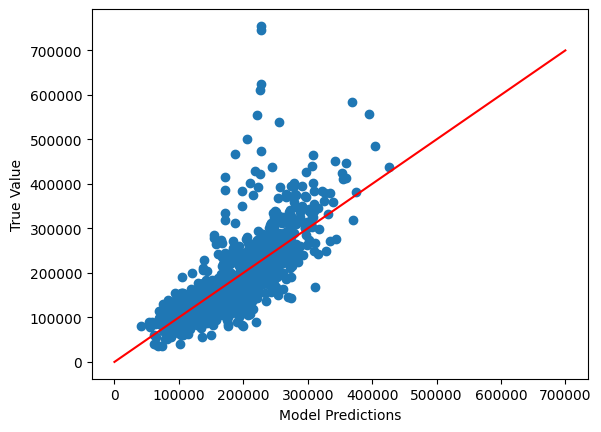

In [46]:
# Full
yhat = model.predict(x)
mse = mean_squared_error(y, yhat)
mae = mean_absolute_error(y, yhat)
print('The full MSE of SalePrice and predicted value is:', mse)
print('The full MAE of SalePrice and predicted value is:', mae)
plt.scatter(yhat, y)
plt.xlabel('Model Predictions')
plt.ylabel('True Value')
plt.plot([0, 700000], [0, 700000], '-', color='r')
plt.show()

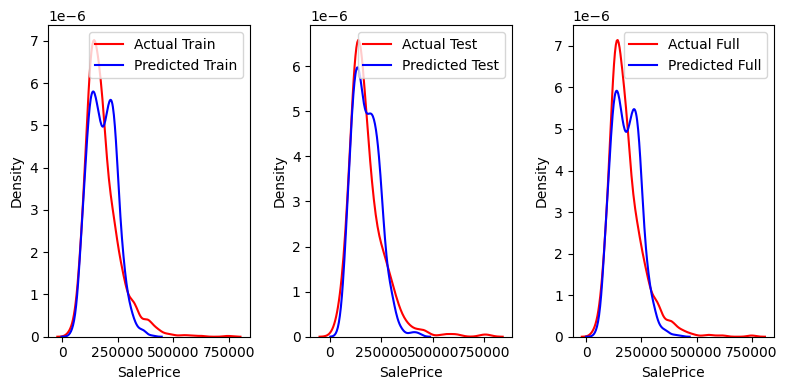

In [47]:
# Vẽ biểu đồ
plt.figure(figsize=(8, 4))
plt.subplot(1, 3, 1)
ax1 = sns.distplot(y_train, hist=False, color="r", label="Actual Train")
sns.distplot(model.predict(x_train), hist=False,
             color="b", label="Predicted Train", ax=ax1)
plt.legend()

plt.subplot(1, 3, 2)
ax2 = sns.distplot(y_test, hist=False, color="r", label="Actual Test")
sns.distplot(model.predict(x_test), hist=False,
             color="b", label="Predicted Test", ax=ax2)
plt.legend()

plt.subplot(1, 3, 3)
ax3 = sns.distplot(y, hist=False, color="r", label="Actual Full")
sns.distplot(model.predict(x), hist=False,
             color="b", label="Predicted Full", ax=ax3)
plt.legend()

plt.tight_layout()
plt.show()

In [48]:

# Dựa trên các thông số của mô hình, ta có thể rút ra một số nhận xét như sau:

# R-square (hệ số xác định):
#   R-square cho thấy phần trăm phương sai của biến phụ thuộc mà mô hình có thể giải thích được. Trong trường hợp này,
#   R-square của tập huấn luyện là khoảng 59.8%, của tập kiểm tra là khoảng 61.2%, và toàn bộ tập dữ liệu là khoảng 60.1%.
#   Mô hình có khả năng giải thích một phần đáng kể của biến phụ thuộc, nhưng cũng còn một phần lớn không thể giải thích.

# Mean Squared Error (MSE - Sai số bình phương trung bình):
#   SE là một phép đo để đánh giá sự khác biệt giữa giá trị dự đoán và giá trị thực tế. MSE càng thấp thì mô hình càng tốt.
#   MSE của tập huấn luyện là khoảng 2,397,822,828.5, của tập kiểm tra là khoảng 2,977,253,099.8 và toàn bộ tập dữ liệu là khoảng 2,513,708,882.8.
#   MSE của tập kiểm tra lớn hơn so với tập huấn luyện, điều này có thể cho thấy mô hình có thể đang gặp hiện tượng quá mức hoá hoặc không khớp với dữ liệu mới.

# Mean Absolute Error (MAE - Sai số tuyệt đối trung bình):
#   MAE là một phép đo khác để đánh giá sự chênh lệch giữa giá trị dự đoán và giá trị thực tế. MAE càng thấp thì mô hình càng tốt.
#   MAE của tập huấn luyện là khoảng 30,391.33, của tập kiểm tra là khoảng 30,596.98.
#   MAE cho thấy trung bình sai số tuyệt đối của mô hình đối với giá trị thực tế trên tập dữ liệu.

# So sánh giữa tập huấn luyện và tập kiểm tra:
#   Trong trường hợp này, R-square và MSE của tập kiểm tra không quá khác biệt so với tập huấn luyện, điều này cho thấy mô hình không bị overfitting một cách nghiêm trọng.
#   Tuy nhiên, có một sự chênh lệch nhỏ về MAE giữa tập huấn luyện và tập kiểm tra, cho thấy mô hình có thể có ít độ chính xác hơn trên dữ liệu mới so với dữ liệu huấn luyện.

# Tổng quan về hiệu suất của mô hình:
#   Dựa trên R-square và MSE, mô hình có vẻ là có hiệu suất tương đối tốt, nhưng vẫn cần được cải thiện để giảm thiểu sai số trên dữ liệu kiểm tra và cải thiện
#   khả năng dự đoán trên dữ liệu mới.

In [49]:
# Phần 5 : Cải tiến hiệu suất mô hình
# Phương pháp hàm bậc 2
from sklearn.preprocessing import PolynomialFeatures
print(x.info())
pr = PolynomialFeatures(degree=2)
x_pr = pr.fit_transform(x)
x.shape, x_pr.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   FullBath           1460 non-null   object 
 1   BedroomAbvGr       1460 non-null   object 
 2   TotRmsAbvGrd_le    1460 non-null   int32  
 3   LotShape_IR1       1460 non-null   float64
 4   LotShape_Other     1460 non-null   float64
 5   LotShape_Reg       1460 non-null   float64
 6   HouseStyle_1.5Fin  1460 non-null   float64
 7   HouseStyle_1Story  1460 non-null   float64
 8   HouseStyle_2Story  1460 non-null   float64
 9   HouseStyle_Other   1460 non-null   float64
 10  LotArea_log        1460 non-null   float64
 11  YearBuilt_log      1460 non-null   float64
 12  1stFlrSF_scaled    1460 non-null   float64
 13  2ndFlrSF_scaled    1460 non-null   float64
dtypes: float64(11), int32(1), object(2)
memory usage: 154.1+ KB
None


((1460, 14), (1460, 120))

In [50]:
x_train, x_test, y_train, y_test = train_test_split(
    x_pr, y, random_state=42, test_size=0.2)
lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression()

In [51]:
print('The full R-square is:', lm.score(x_pr, y))
print('The train R-square is:', lm.score(x_train, y_train))
print('The test R-square is:', lm.score(x_test, y_test))

The full R-square is: 0.7670694512571917
The train R-square is: 0.7755627077568445
The test R-square is: 0.7404873623675581


In [52]:
# Mặc dù mô hình có hiệu suất khá tốt trên tập huấn luyện,
# nhưng không thể áp dụng được lên dữ liệu mới (tập kiểm tra hoặc toàn bộ tập dữ liệu).
# Vấn đề này có thể là do overfitting, khi mô hình đã học quá nhiều các chi tiết của dữ liệu huấn luyện
# mà không thể tổng quát hóa được cho dữ liệu mới.
# => Phương pháp tạo hàm bậc 2 không phù hợp

In [53]:
x['FullBath'] = x['FullBath'].astype('int32')
x['BedroomAbvGr'] = x['BedroomAbvGr'].astype('int32')

In [54]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   FullBath           1460 non-null   int32  
 1   BedroomAbvGr       1460 non-null   int32  
 2   TotRmsAbvGrd_le    1460 non-null   int32  
 3   LotShape_IR1       1460 non-null   float64
 4   LotShape_Other     1460 non-null   float64
 5   LotShape_Reg       1460 non-null   float64
 6   HouseStyle_1.5Fin  1460 non-null   float64
 7   HouseStyle_1Story  1460 non-null   float64
 8   HouseStyle_2Story  1460 non-null   float64
 9   HouseStyle_Other   1460 non-null   float64
 10  LotArea_log        1460 non-null   float64
 11  YearBuilt_log      1460 non-null   float64
 12  1stFlrSF_scaled    1460 non-null   float64
 13  2ndFlrSF_scaled    1460 non-null   float64
dtypes: float64(11), int32(3)
memory usage: 142.7 KB


In [55]:
# Sử dụng ma trận tương quan để lấy ra những biến ảnh hưởng lớn đến SalePrice
correlation_matrix = df.corr()

# Sắp xếp theo giá trị tương quan với SalePrice
saleprice_correlation = correlation_matrix['SalePrice'].sort_values(
    ascending=False)

# Hiển thị các biến có tương quan cao nhất với SalePrice
saleprice_correlation

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

In [56]:
collect_list = ['OverallQual', 'GrLivArea', 'GarageCars',
                'GarageArea', 'TotalBsmtSF', 'YearRemodAdd']
x1 = df[collect_list]

In [57]:
for i in collect_list:
    n = df[i].nunique()
    if n <= 15:
        print(i, '-', df[i].unique())
    else:
        print(i, "- unique value:", n)

OverallQual - [ 7  6  8  5  9  4 10  3  1  2]
GrLivArea - unique value: 861
GarageCars - [2 3 1 0 4]
GarageArea - unique value: 441
TotalBsmtSF - unique value: 721
YearRemodAdd - unique value: 61


In [58]:
x1['OverallQual'] = x1['OverallQual'].astype('object')
x1['GarageCars'] = x1['GarageCars'].astype('object')

In [59]:
num_cols1 = []
cat_cols1 = []
cat_cols1 = x1.select_dtypes('object').columns
num_cols1 = x1.select_dtypes('number').columns

=====
central tendency of GrLivArea: {'mean': 1515.463698630137, 'median': 1464.0, 'mode': 864, 'min': 334, 'max': 5642, 'range': 5308}
=====
Dispersion of GrLivArea: 
 {'range': 5308, 'q1': 1129.5, 'q3': 1776.75, 'iqr': 647.25, 'var': 276129.63336259616, 'skew': 1.3665603560164552, 'kurtosis': 4.895120580693174}
=====


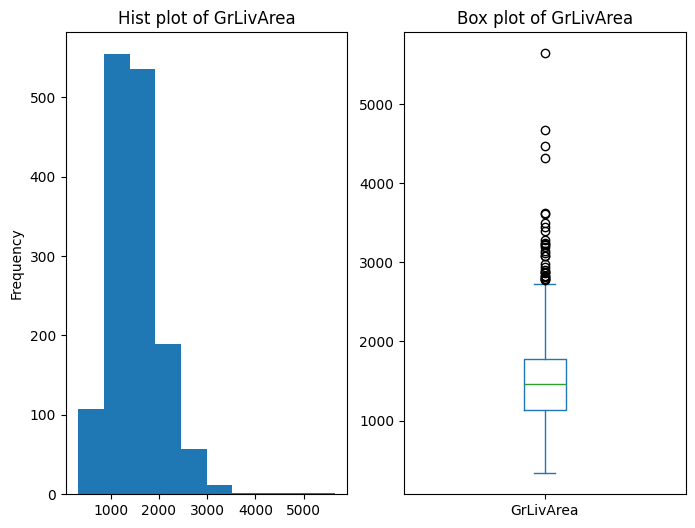

=====
central tendency of GarageArea: {'mean': 472.9801369863014, 'median': 480.0, 'mode': 0, 'min': 0, 'max': 1418, 'range': 1418}
=====
Dispersion of GarageArea: 
 {'range': 1418, 'q1': 334.5, 'q3': 576.0, 'iqr': 241.5, 'var': 45712.51022890529, 'skew': 0.17998090674623907, 'kurtosis': 0.9170672022708684}
=====


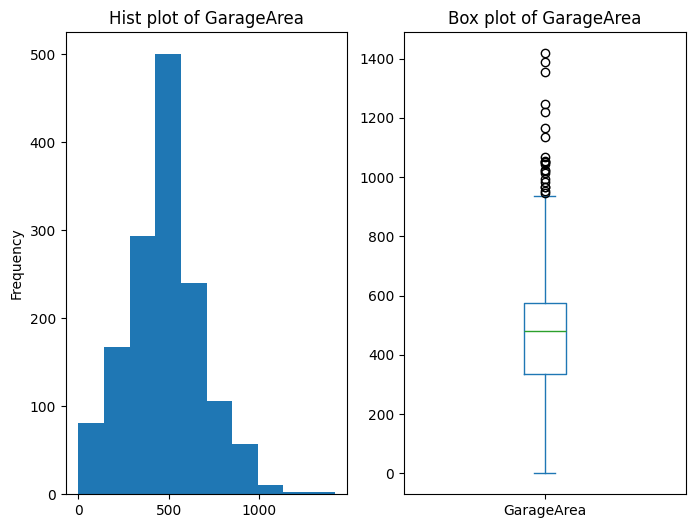

=====
central tendency of TotalBsmtSF: {'mean': 1057.4294520547944, 'median': 991.5, 'mode': 0, 'min': 0, 'max': 6110, 'range': 6110}
=====
Dispersion of TotalBsmtSF: 
 {'range': 6110, 'q1': 795.75, 'q3': 1298.25, 'iqr': 502.5, 'var': 192462.36170908928, 'skew': 1.5242545490627664, 'kurtosis': 13.250483281984796}
=====


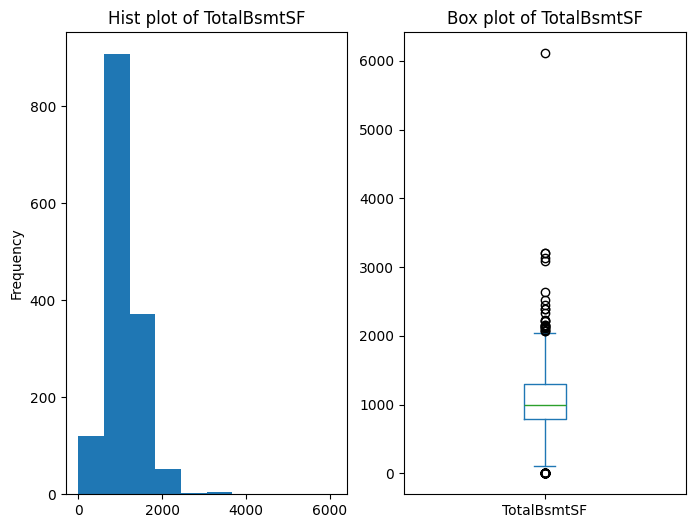

=====
central tendency of YearRemodAdd: {'mean': 1984.8657534246574, 'median': 1994.0, 'mode': 1950, 'min': 1950, 'max': 2010, 'range': 60}
=====
Dispersion of YearRemodAdd: 
 {'range': 60, 'q1': 1967.0, 'q3': 2004.0, 'iqr': 37.0, 'var': 426.2328222558135, 'skew': -0.5035620027004709, 'kurtosis': -1.2722451924732956}
=====


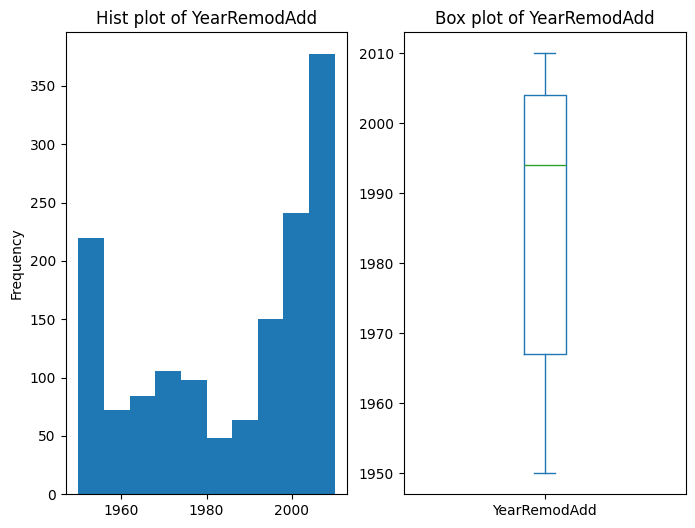

In [60]:
for col in num_cols1:
    _analyzer.analyze_numeric_variable(variable_name=col, df=x1)
    print('='*60)

Class count of OverallQual:

5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64


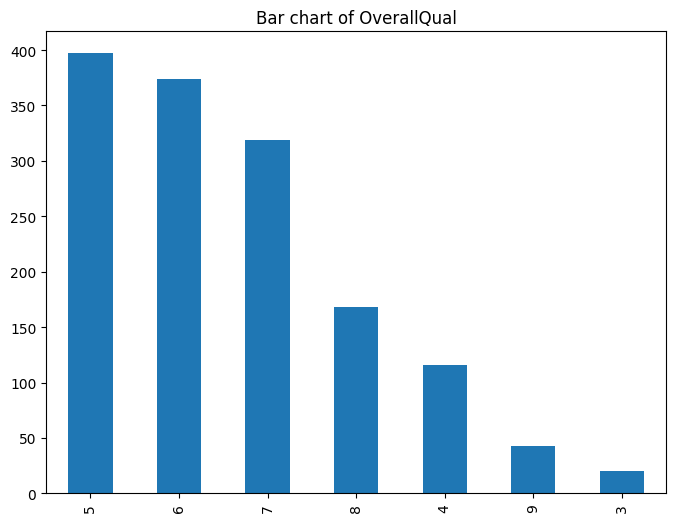

Class count of GarageCars:

2    824
1    369
3    181
0     81
4      5
Name: GarageCars, dtype: int64


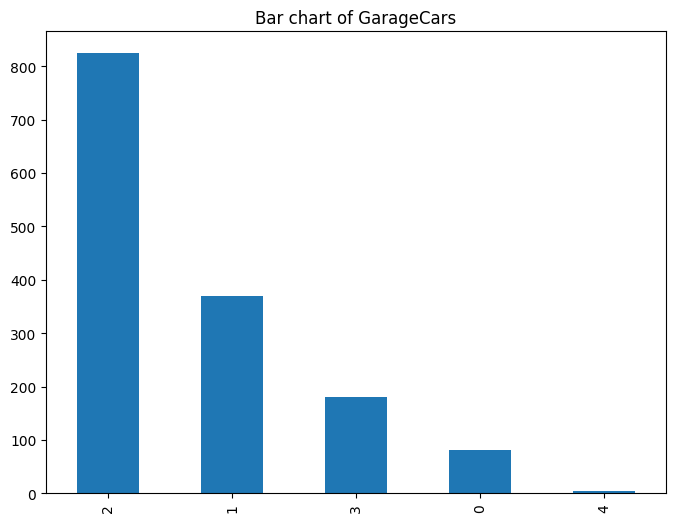

In [61]:
for col in cat_cols1:
    _analyzer.analyze_category_variable(variable_name=col, df=x1)
    print('='*60)

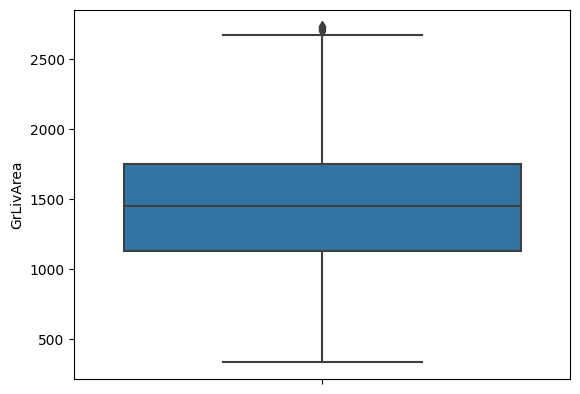

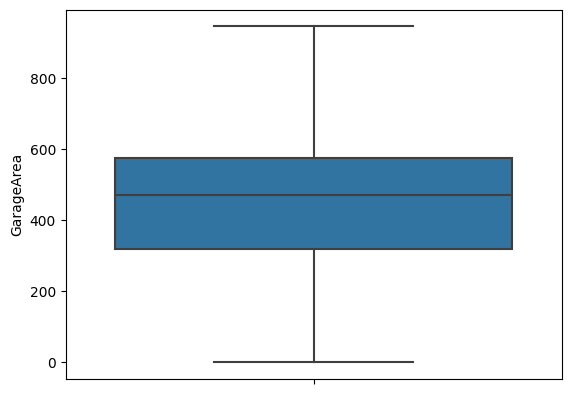

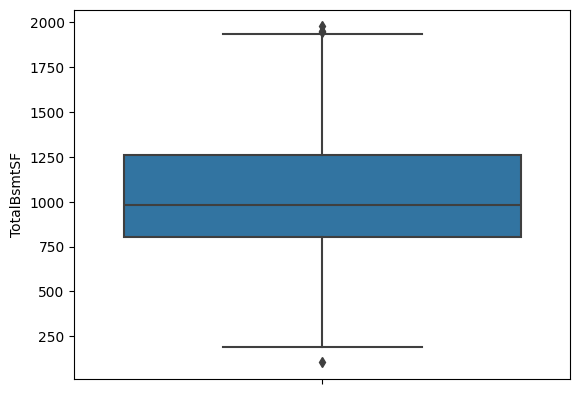

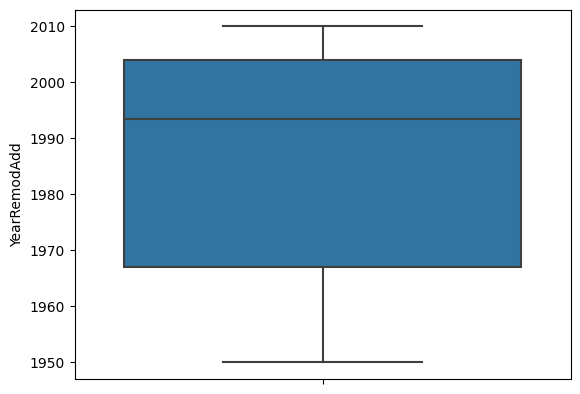

In [62]:
for col in num_cols1:
    x1[num_cols1] = remove_outliers(x1[num_cols1], col)
    sns.boxplot(data=x1[num_cols1], y=col)
    plt.show()

In [63]:
for col in num_cols1:
    statistic, p_value = stats.shapiro(df[col])
    alpha = 0.05

    # So sánh giá trị p với mức ý nghĩa
    if p_value <= alpha:
        print("Có bằng chứng để từ chối giả thuyết H0 cho {}.".format(col))
    else:
        print("Không có bằng chứng để từ chối giả thuyết H0 cho {}.".format(col))

Có bằng chứng để từ chối giả thuyết H0 cho GrLivArea.
Có bằng chứng để từ chối giả thuyết H0 cho GarageArea.
Có bằng chứng để từ chối giả thuyết H0 cho TotalBsmtSF.
Có bằng chứng để từ chối giả thuyết H0 cho YearRemodAdd.


In [64]:
scaler = preprocessing.StandardScaler()
x1[num_cols1] = scaler.fit_transform(x1[num_cols1])
x1[num_cols1] = pd.DataFrame(x1[num_cols1], columns=num_cols1)

In [65]:
x1[num_cols1]

,GrLivArea,GarageArea,TotalBsmtSF,YearRemodAdd
0,0.558830,0.452230,-0.561167,0.882916
1,-0.460857,0.003517,0.645808,-0.431267
2,0.731812,0.758170,-0.370905,0.834242
3,0.574762,0.931536,-0.858451,-0.723307
4,1.669560,1.920742,0.297985,0.736895
...,...,...,...,...
1455,0.415436,0.003517,-0.272801,0.736895
1456,1.385049,0.207477,1.478204,0.152814
1457,1.992764,-1.057075,0.318795,1.028936
1458,-0.879657,-1.118263,0.098804,0.542202


In [66]:
x1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OverallQual   1460 non-null   object 
 1   GrLivArea     1354 non-null   float64
 2   GarageCars    1460 non-null   object 
 3   GarageArea    1354 non-null   float64
 4   TotalBsmtSF   1354 non-null   float64
 5   YearRemodAdd  1354 non-null   float64
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [67]:
x1['OverallQual'] = x1['OverallQual'].astype('int')
x1['GarageCars'] = x1['GarageCars'].astype('int')

In [68]:
x = pd.concat([x, x1], axis=1)

In [69]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   FullBath           1460 non-null   int32  
 1   BedroomAbvGr       1460 non-null   int32  
 2   TotRmsAbvGrd_le    1460 non-null   int32  
 3   LotShape_IR1       1460 non-null   float64
 4   LotShape_Other     1460 non-null   float64
 5   LotShape_Reg       1460 non-null   float64
 6   HouseStyle_1.5Fin  1460 non-null   float64
 7   HouseStyle_1Story  1460 non-null   float64
 8   HouseStyle_2Story  1460 non-null   float64
 9   HouseStyle_Other   1460 non-null   float64
 10  LotArea_log        1460 non-null   float64
 11  YearBuilt_log      1460 non-null   float64
 12  1stFlrSF_scaled    1460 non-null   float64
 13  2ndFlrSF_scaled    1460 non-null   float64
 14  OverallQual        1460 non-null   int32  
 15  GrLivArea          1354 non-null   float64
 16  GarageCars         1460 

In [70]:
x.isnull().sum()

FullBath               0
BedroomAbvGr           0
TotRmsAbvGrd_le        0
LotShape_IR1           0
LotShape_Other         0
LotShape_Reg           0
HouseStyle_1.5Fin      0
HouseStyle_1Story      0
HouseStyle_2Story      0
HouseStyle_Other       0
LotArea_log            0
YearBuilt_log          0
1stFlrSF_scaled        0
2ndFlrSF_scaled        0
OverallQual            0
GrLivArea            106
GarageCars             0
GarageArea           106
TotalBsmtSF          106
YearRemodAdd         106
dtype: int64

In [71]:
process_list = ['GrLivArea', 'GarageArea',
                'TotalBsmtSF', 'YearRemodAdd']
for col in process_list:
    m = x[col].mean()
    x[col].fillna(m, inplace=True)

In [72]:
x.isnull().sum()

FullBath             0
BedroomAbvGr         0
TotRmsAbvGrd_le      0
LotShape_IR1         0
LotShape_Other       0
LotShape_Reg         0
HouseStyle_1.5Fin    0
HouseStyle_1Story    0
HouseStyle_2Story    0
HouseStyle_Other     0
LotArea_log          0
YearBuilt_log        0
1stFlrSF_scaled      0
2ndFlrSF_scaled      0
OverallQual          0
GrLivArea            0
GarageCars           0
GarageArea           0
TotalBsmtSF          0
YearRemodAdd         0
dtype: int64

In [73]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, random_state=42, test_size=0.2)

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [74]:
# Đánh giá mô hình (score: r squared,mse,mae, vẽ biểu đồ)
# r squared
print('The train R-square is:', model.score(x_train, y_train))
print('The test R-square is:', model.score(x_test, y_test))
print('The full R-square is:', model.score(x, y))

The train R-square is: 0.7476411724115397
The test R-square is: 0.7483869743808107
The full R-square is: 0.7478659181101781


The train MSE of SalePrice and predicted value is: 1505206940.9311888
The train MAE of SalePrice and predicted value is: 26048.157059527002


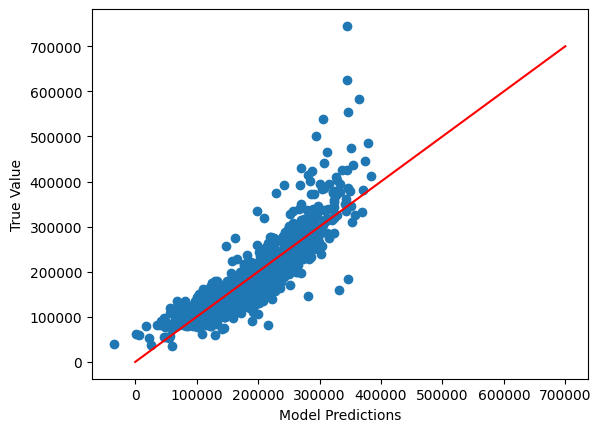

In [75]:
# mse, mae
from sklearn.metrics import mean_squared_error, mean_absolute_error
# train
yhat = model.predict(x_train)
mse = mean_squared_error(y_train, yhat)
mae = mean_absolute_error(y_train, yhat)
print('The train MSE of SalePrice and predicted value is:', mse)
print('The train MAE of SalePrice and predicted value is:', mae)
plt.scatter(yhat, y_train)
plt.xlabel('Model Predictions')
plt.ylabel('True Value')
plt.plot([0, 700000], [0, 700000], '-', color='r')
plt.show()

The test MSE of SalePrice and predicted value is: 1929953984.4765136
The test MAE of SalePrice and predicted value is: 26725.132702740102


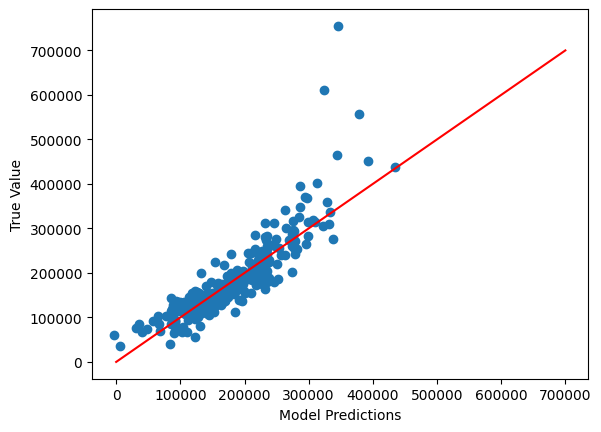

In [76]:
# Test
yhat = model.predict(x_test)
mse = mean_squared_error(y_test, yhat)
mae = mean_absolute_error(y_test, yhat)
print('The test MSE of SalePrice and predicted value is:', mse)
print('The test MAE of SalePrice and predicted value is:', mae)
plt.scatter(yhat, y_test)
plt.xlabel('Model Predictions')
plt.ylabel('True Value')
plt.plot([0, 700000], [0, 700000], '-', color='r')
plt.show()

The full MSE of SalePrice and predicted value is: 1590156349.6402538
The full MAE of SalePrice and predicted value is: 26183.55218816962


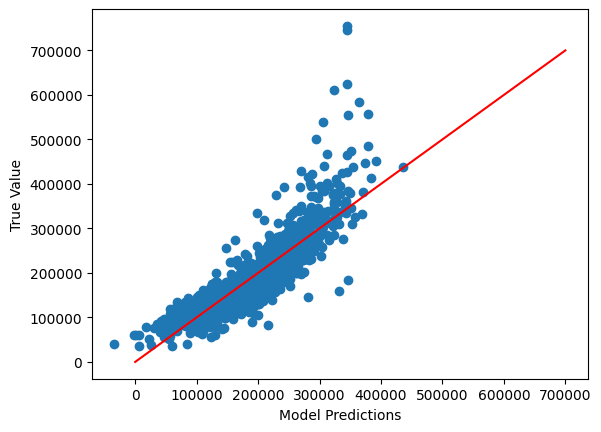

In [77]:
# Full
yhat = model.predict(x)
mse = mean_squared_error(y, yhat)
mae = mean_absolute_error(y, yhat)
print('The full MSE of SalePrice and predicted value is:', mse)
print('The full MAE of SalePrice and predicted value is:', mae)
plt.scatter(yhat, y)
plt.xlabel('Model Predictions')
plt.ylabel('True Value')
plt.plot([0, 700000], [0, 700000], '-', color='r')
plt.show()

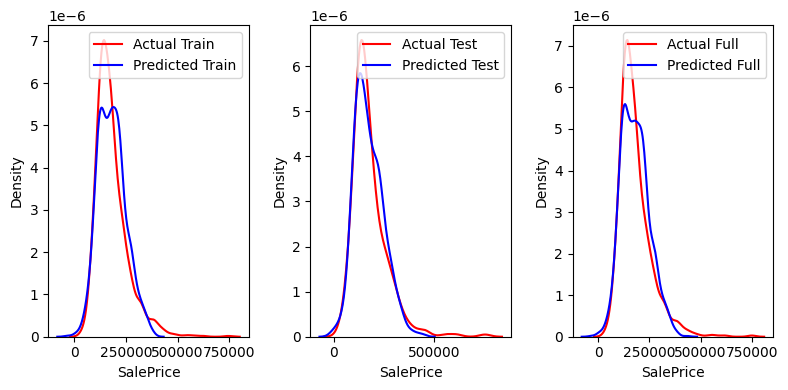

In [78]:
# Vẽ biểu đồ
plt.figure(figsize=(8, 4))
plt.subplot(1, 3, 1)
ax1 = sns.distplot(y_train, hist=False, color="r", label="Actual Train")
sns.distplot(model.predict(x_train), hist=False,
             color="b", label="Predicted Train", ax=ax1)
plt.legend()

plt.subplot(1, 3, 2)
ax2 = sns.distplot(y_test, hist=False, color="r", label="Actual Test")
sns.distplot(model.predict(x_test), hist=False,
             color="b", label="Predicted Test", ax=ax2)
plt.legend()

plt.subplot(1, 3, 3)
ax3 = sns.distplot(y, hist=False, color="r", label="Actual Full")
sns.distplot(model.predict(x), hist=False,
             color="b", label="Predicted Full", ax=ax3)
plt.legend()

plt.tight_layout()
plt.show()

In [79]:
# Tổng quan về hiệu suất của mô hình:
#   Dựa trên R-square và MSE, mô hình có vẻ là có hiệu suất tương đối tốt,
#   nhưng vẫn cần được cải thiện để giảm thiểu sai số trên dữ liệu kiểm tra và cải thiện khả năng dự đoán trên dữ liệu mới.
#   MAE cũng cho thấy mô hình đưa ra dự đoán gần với giá trị thực tế trên cả tập huấn luyện và tập kiểm tra.